In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                Global Country Information Dataset 2023           23KB  2023-07-08 20:37:33           9524        364  1.0              
juhibhojani/house-price                                     House Price                                        7MB  2023-08-02 16:51:21           1150         42  0.9411765        
arnavsmayan/netflix-userbase-dataset                        Netflix Userbase Dataset                          25KB  2023-07-04 07:38:41          11032        196  1.0              
alphiree/cardiovascular-diseases-risk-prediction-dataset    Cardiovascular Diseases Risk Predic

In [ ]:
#!kaggle datasets download -d tunguz/xview2-challenge-dataset-tier-3-data
!kaggle datasets download -d tunguz/xview2-challenge-dataset-train-and-test

 99% 10.3G/10.3G [06:11<00:03, 32.6MB/s]

In [ ]:
#unzip all
#with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    #zip_ref.extractall(target_dir)


In [ ]:
import zipfile
def unzip(input_file, prefix):
  with zipfile.ZipFile(input_file, 'r') as zip_ref:
      for file_name in zip_ref.namelist():
          if file_name.startswith(prefix):
              zip_ref.extract(file_name, target_dir)

In [ ]:
zip_file = './xview2-challenge-dataset-train-and-test.zip'
target_dir = './'

In [ ]:
image_prefix = 'train/train/images/hurricane-harvey_'
label_prefix  = 'train/train/labels/hurricane-harvey_'
unzip(zip_file, image_prefix)
unzip(zip_file, label_prefix)

In [ ]:
import os
onlyfiles = next(os.walk('/content/train/train/images/'))[2]
print(len(onlyfiles))

In [ ]:
pre_hurricane_images = sorted([f for f in os.listdir('/content/train/train/images/') if 'hurricane' in f and 'pre' in f])
print(len(pre_hurricane_images))

In [ ]:
from IPython.display import Image
# pre-disaster
Image(filename='./train/train/images/hurricane-harvey_00000012_pre_disaster.png', width=600)

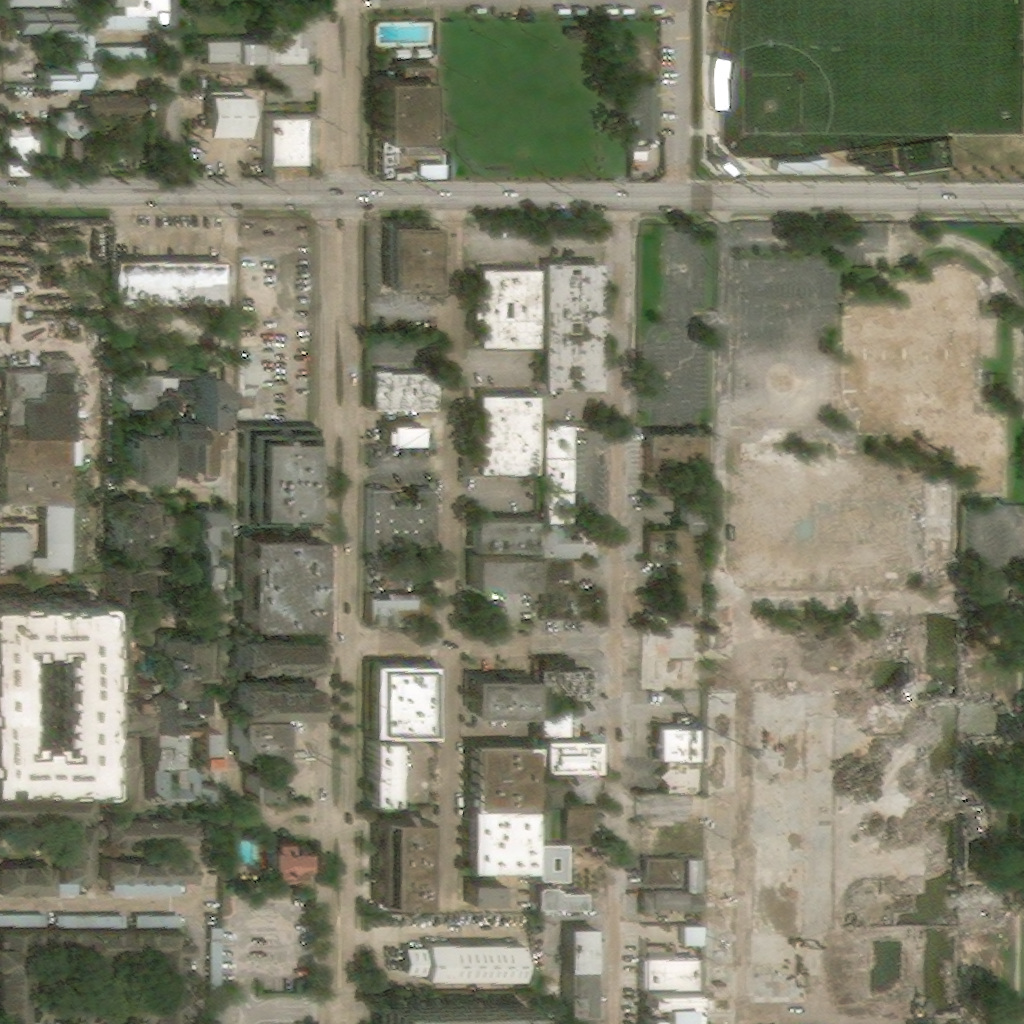

In [ ]:
# post-disaster
Image(filename='./train/train/images/hurricane-harvey_00000012_post_disaster.png', width=600)

# data exploration

In [ ]:
# label json
import json
import pandas as pd
from pandas.io.json import json_normalize

with open ('./train/train/labels/hurricane-harvey_00000012_post_disaster.json') as f:
    data = json.load(f)

# convert buildings json data into pandas dataframe:
buildings_raw = data['features']['xy']
buildings_df = pd.DataFrame.from_dict(json_normalize(buildings_raw), orient='columns')
buildings_df

<ipython-input-15-7311a9c71373>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  buildings_df = pd.DataFrame.from_dict(json_normalize(buildings_raw), orient='columns')


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((925.3766075842402 1017.411386694495,...",building,un-classified,45a3ffa7-17ea-4761-96f7-0eb7e1da59e0
1,"POLYGON ((912.4898825837745 589.7189814402298,...",building,un-classified,d925ecbb-7919-4269-96b4-e23524e3efbe
2,"POLYGON ((848.62205124756 403.1359376472263, 8...",building,un-classified,8b6673da-eb93-4cb7-9262-dd8f57c310a5
3,"POLYGON ((381.620138994431 1022.987876355099, ...",building,no-damage,f0368251-c3b2-41e5-b9b2-e135dde2fbdf
4,"POLYGON ((525.065538882638 981.2740221920303, ...",building,no-damage,b252757f-c820-4f77-a0a6-9c73480f9a11
...,...,...,...,...
82,"POLYGON ((12.87713469435986 650.2444150342757,...",building,no-damage,7a958361-404a-4a84-9bf0-5afa6cd3bd04
83,"POLYGON ((601.2442787771542 705.7644565435112,...",building,no-damage,1fed8514-cbd1-4617-8f35-3a3192b3d004
84,"POLYGON ((568.281888156878 30.2520496155735, 5...",building,no-damage,997c6c11-43b0-4870-ae94-ff05061c1b3c
85,"POLYGON ((141.4736738110231 105.6274602337159,...",building,no-damage,e951b7fb-1f89-4c41-a2a1-89afde3566f2


In [ ]:
# for a single image
buildings_df['properties.subtype'].value_counts()

no-damage        78
un-classified     9
Name: properties.subtype, dtype: int64

In [ ]:
# damage count for all post images
directory = './train/train/labels/'
post_disaster_files = [f for f in os.listdir(directory) if 'post' in f]

# loop over post disaster data
all_json_data = []
for file in post_disaster_files:
    with open(directory + file) as f:
        data = json.load(f)
        all_json_data.append(data)

In [ ]:
df = pd.DataFrame()
for curr_data in all_json_data:
    curr_building_raw = curr_data['features']['xy']
    df = df.append(json_normalize(curr_building_raw))


In [ ]:
df.shape[0]

23014

In [ ]:
# for all buildings
df['properties.subtype'].value_counts()

no-damage        11423
major-damage      8238
minor-damage      2663
destroyed          401
un-classified      289
Name: properties.subtype, dtype: int64

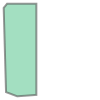

In [ ]:
from shapely.geometry import Polygon
import shapely.wkt

P = shapely.wkt.loads(data['features']['xy'][12]['wkt'])
P

In [ ]:
from PIL import Image, ImageDraw
from shapely import wkt

# annotate & display images
damage_dict = {
    "no-damage": (0, 255, 0, 50), #green
    "minor-damage": (0, 0, 255, 50), #blue
    "major-damage": (255, 69, 0, 50), #orange
    "destroyed": (255, 0, 0, 50), #red
    "un-classified": (255, 255, 255, 50) #white
}


def get_damage_type(properties):
    if 'subtype' in properties:
        return properties['subtype']
    else:
        return 'no-damage'

def draw_polygon(label_json, draw):
    wkt_polygons = []

    with open(label_json) as json_file:
        image_json = json.load(json_file)

    coords = image_json['features']['xy']

    for coord in coords:
        damage = get_damage_type(coord['properties'])
        wkt_polygons.append((damage, coord['wkt']))

    polygons = []

    for damage, swkt in wkt_polygons:
        polygons.append((damage, wkt.loads(swkt)))

    for damage, polygon in polygons:
        x,y = polygon.exterior.coords.xy
        coords = list(zip(x,y))
        draw.polygon(coords, damage_dict[damage])

    del draw


In [ ]:
import matplotlib.pyplot as plt

def plot(img_path, label_path):
    img = Image.open(img_path)
    draw = ImageDraw.Draw(img, 'RGBA')

    #draw polygon
    draw_polygon(label_path, draw)

    fig, ax = plt.subplots(1,1)
    #fig.set_size_inches(15, 15)
    TITLE_FONT_SIZE = 24
    ax.imshow(img);
    ax.set_title('Post Disaster', fontsize=TITLE_FONT_SIZE)
    plt.show()


In [ ]:
pre_image = './train/train/images/hurricane-harvey_00000007_pre_disaster.png'
post_image = './train/train/images/hurricane-harvey_00000012_post_disaster.png'
label_image = './train/train/labels/hurricane-harvey_00000012_post_disaster.json'

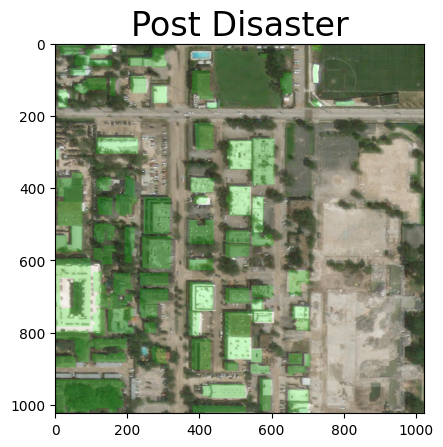

In [ ]:
plot(post_image, label_image)

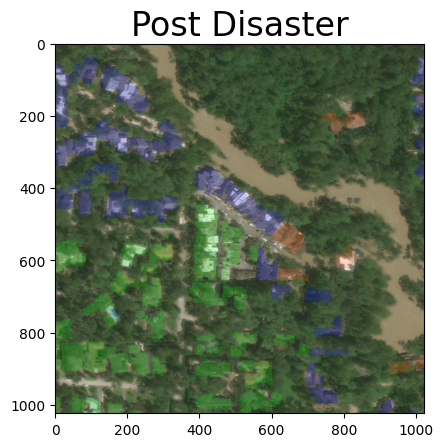

In [ ]:
d_img = './train/train/images/hurricane-harvey_00000001_post_disaster.png'
d_j = './train/train/labels/hurricane-harvey_00000001_post_disaster.json'
plot(d_img, d_j)

# create masks
# data augmentation / classes default dict.
# split pre-post & train-validation set
# prepare datasets for mdelling
# CNN model
# model evaluation metrics

In [ ]:
import json
from os import path, walk, makedirs
from sys import exit, stderr
import os
from cv2 import fillPoly
import cv2
import numpy as np
from shapely import wkt
from shapely.geometry import mapping, Polygon
from shapely.wkt import loads
from skimage.io import imread
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
root_dir = './train/train/'
image_dir =  path.join(root_dir, 'images')
labels_dir =  path.join(root_dir, 'labels')
mask_dir = os.makedirs(path.join(root_dir, 'masks'))

In [ ]:
# create masks

#The function originally taken from https://github.com/DIUx-xView/xView2_first_place/blob/master/create_masks.py but modified

def mask_for_polygon(poly, im_size=(1024, 1024)):
    img_mask = np.zeros(im_size, np.uint8)
    int_coords = lambda x: np.array(x).round().astype(np.int32)
    exteriors = [int_coords(poly.exterior.coords)]
    interiors = [int_coords(pi.coords) for pi in poly.interiors]
    cv2.fillPoly(img_mask, exteriors, 1)
    cv2.fillPoly(img_mask, interiors, 0)
    return img_mask

def process_image(json_file):
    jfile = json.load(open(json_file))
    msk = np.zeros((1024, 1024), dtype='uint8')

    for feat in jfile['features']['xy']:
        poly = loads(feat['wkt'])
        _msk = mask_for_polygon(poly)
        msk[_msk > 0] = 255
    cv2.imwrite(json_file.replace('labels', 'masks').replace('.json', '.png'), msk, [cv2.IMWRITE_PNG_COMPRESSION, 9]) #save

#getting image dimensions
def get_dims(chip_file):
    pil_img = imread(chip_file)
    img = np.array(pil_img)
    w, h, c = img.shape
    return w, h, c

# getting polygon coordinates from json files
def get_coord(chip_json):
    coordinates = {}
    for i in chip_json['features']['xy']:
        i_shape = wkt.loads(i['wkt'])
        coords = list(mapping(i_shape)['coordinates'][0])
        coordinates[i['properties']['uid']] = (np.array(coords, np.int32))
    return coordinates

def load_jsons(json_full_path):
    jdata = json.load(open(json_full_path))
    return jdata

In [ ]:
#Iterating through the folder containing json files and storing their names
jsons = [j for j in next(walk(labels_dir))[2]]

#iterating through json files, and making sure that are no files with other formats among them
for j in tqdm([j for j in jsons if j.endswith('json')], unit='poly', leave=False):
        #split the name of the file and the format, and replace .json by .png to access the images, as they have the same name standard
        chip_img_id = path.splitext(j)[0] + '.png'
        #get file name without the extension. This will be used as the name of the mask file
        mask_file_name = path.splitext(j)[0]

        #reading json files
        json_full_path = path.join(labels_dir, j)
        chip_json = load_jsons(json_full_path)

        #getting image dimensions
        chip_file = path.join(image_dir, chip_img_id)
        chip_size = get_dims(chip_file)

        # getting polygon coordinates from json files
        coordinates = get_coord(chip_json)

        #creating masks for each polygon and saving mask images
        process_image(json_full_path)

In [ ]:
# display masks
from IPython.display import Image
Image(filename='./train/train/images/hurricane-harvey_00000029_pre_disaster.png', width=600)

In [ ]:
Image(filename='./train/train/masks/hurricane-harvey_00000029_post_disaster.png', width=600)

# pre processing steps

In [ ]:
from PIL import Image
import time
import pandas as pd
import os
import math
import random
import logging
import datetime
import shapely
from collections import defaultdict
from sklearn.model_selection import train_test_split
logging.basicConfig(level=logging.INFO)

In [ ]:
# split pre/post data
output_dir_pre = './train/train/processed/pre'
output_dir_post = './train/train/processed/post'

In [ ]:
os.makedirs(output_dir_pre)
os.makedirs(output_dir_post)

In [ ]:
damage = defaultdict(lambda: 0)
damage['destroyed'] = 3
damage['major-damage'] = 2
damage['minor-damage'] = 1
damage['no-damage'] = 0

In [ ]:
# This function finds the corners of each polygon.
# As it is a polygon, we are using the max coordinate on both x and y axis to create a square image
# The function was adapated to crop mask images as well

def process_img(img_array, polygon_pts, scale_pct):
    """Process Raw Data into
            Args:
                img_array (numpy array): numpy representation of image.
                polygon_pts (array): corners of the building polygon.
            Returns:
                numpy array: .
    """
    if len(img_array.shape) == 3:
        height, width, _ = img_array.shape
    else:
        height, width = img_array.shape

    xcoords = polygon_pts[:, 0]
    ycoords = polygon_pts[:, 1]
    xmin, xmax = np.min(xcoords), np.max(xcoords)
    ymin, ymax = np.min(ycoords), np.max(ycoords)

    xdiff = xmax - xmin
    ydiff = ymax - ymin

    #Extend image by scale percentage
    xmin = max(int(xmin - (xdiff * scale_pct)), 0)
    xmax = min(int(xmax + (xdiff * scale_pct)), width)
    ymin = max(int(ymin - (ydiff * scale_pct)), 0)
    ymax = min(int(ymax + (ydiff * scale_pct)), height)


    if len(img_array.shape) == 3:
        return img_array[ymin:ymax, xmin:xmax, :]
    else:
        return img_array[ymin:ymax, xmin:xmax]


In [ ]:
# Creating one separate image per polygon
# We also calculated the image mean and subtracted from the original array

x = []
y = []

images = [i for i in next(walk(image_dir))[2]]
for img in tqdm(images):
    if '_pre_' in img:
        output_folder = output_dir_pre
    else:
        output_folder = output_dir_post

    #Opening each image and transforming it into a numpy array and subtracting the image mean
    imgage_obj = Image.open(path.join(image_dir, img))
    image_array = np.array(imgage_obj)
    #image_array = image_array - image_array.mean()

    #Getting the respective label for each picture
    label_path = path.join(image_dir.replace('images', 'labels'), img.replace('png', 'json'))
    label_file = open(label_path)
    label_data = json.load(label_file)


    for building in label_data['features']['xy']:
        #As pre-disaster images don't have a label, we assinged no-demage to them
        try:
            damage_type = building['properties']['subtype']
        except:
            damage_type = "no-damage"


        #Creating two vectors, one with the label (y) and the other with the building uuid(X).
        building_uuid = building['properties']['uid'] + ".png"
        y.append(damage[damage_type])
        x.append(building_uuid)

        #Creating separate images for each building based on the corners of the polygons
        #Same process is repeated for masks
        i_shape = shapely.wkt.loads(building['wkt'])
        polygon_corners = np.array(list(i_shape.exterior.coords))
        poly_img = process_img(image_array, polygon_corners, 0.8)
        cv2.imwrite(path.join(output_folder,building_uuid), poly_img)

In [ ]:
output_csv_dir = './train/train/data'
os.makedirs(output_csv_dir)
train_csv = os.path.join(output_csv_dir, "train.csv")
test_csv = os.path.join(output_csv_dir, "test.csv")

In [ ]:
# split train/test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train = {'uuid': x_train, 'labels': y_train}
test = {'uuid': x_test, 'labels': y_test}

train_df = pd.DataFrame(train)
train_df.to_csv(train_csv)

test_df = pd.DataFrame(test)
test_df.to_csv(test_csv)

# Data Preparation

In [ ]:
# data preparation
damage_intensity_encoding = dict()
damage_intensity_encoding[3] = '3'
damage_intensity_encoding[2] = '2'
damage_intensity_encoding[1] = '1'
damage_intensity_encoding[0] = '0'

In [ ]:
# simple CNN model
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
# import cv2
import tensorflow as tf
from matplotlib.image import imread
print("Number of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')), "\n")
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Cropping2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

# simple sequqntial CNN

In [ ]:
batch_size = 16
img_height = 128
img_width = 128
num_classes = 4
random_seed = 123

In [ ]:
# generate train, validation & test dataset

def train_generator(df, train_data_dir):

    df = df.replace({"labels" : damage_intensity_encoding })
    arguments = dict(horizontal_flip=True,
                     vertical_flip=True,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zca_whitening=True,
                     shear_range=0.1,
                     zoom_range=0.1,
                     channel_shift_range=0.1,
                     rescale=1/255.)

    image_datagen = keras.preprocessing.image.ImageDataGenerator(**arguments)

    train_datagen =  image_datagen.flow_from_dataframe(dataframe=df,
                                       directory=train_data_dir,
                                       x_col='uuid',
                                       y_col='labels',
                                       batch_size=batch_size,
                                       seed=random_seed,
                                       class_mode="categorical",
                                       target_size=(128, 128))

    return train_datagen


def val_generator(df, train_data_dir):

    df = df.replace({"labels" : damage_intensity_encoding })
    arguments = dict(horizontal_flip=False,
                     vertical_flip=False,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zca_whitening=True,
                     shear_range=0.1,
                     zoom_range=0.1,
                     channel_shift_range=0.1,
                     rescale=1/255.)

    image_datagen = keras.preprocessing.image.ImageDataGenerator(**arguments)

    val_datagen =  image_datagen.flow_from_dataframe(dataframe=df,
                                       directory=train_data_dir,
                                       x_col='uuid',
                                       y_col='labels',
                                       batch_size=batch_size,
                                       seed=random_seed,
                                       class_mode="categorical",
                                       target_size=(128, 128))

    return val_datagen



def test_generator(df, test_dir):
    df = df.replace({"labels" : damage_intensity_encoding })

    gen = keras.preprocessing.image.ImageDataGenerator(
                             rescale=1/255.)
    return gen.flow_from_dataframe(dataframe=df,
                                   directory=test_dir,
                                   x_col='uuid',
                                   y_col='labels',
                                   batch_size=batch_size,
                                   shuffle=False,
                                   seed=random_seed,
                                   class_mode="categorical",
                                   target_size=(128, 128))


In [ ]:
model = Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    #layers.Dense(num_classes, activation='sigmoid',name='output')
    layers.Dense(num_classes, activation='softmax', name='output')
])


In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

In [ ]:
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True,show_dtype=False,show_layer_names=False,rankdir="TB",expand_nested=False,dpi=96,layer_range=None,show_layer_activations=True,)

In [ ]:
!pip install visualkeras
import visualkeras
from PIL import ImageFont

visualkeras.layered_view(model, legend=True)

In [ ]:
# Augments the training, val, test data
train_gen = train_generator(train_df, '/content/train/train/processed/post')

val_gen = val_generator(train_df, '/content/train/train/processed/post')

test_gen = test_generator(test_df, '/content/train/train/processed/post')

Found 36822 validated image filenames belonging to 4 classes.
Found 36822 validated image filenames belonging to 4 classes.
Found 9206 validated image filenames belonging to 4 classes.


In [ ]:
history = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=25,
  callbacks=[early],
  steps_per_epoch=train_gen.samples//batch_size,
  validation_steps=val_gen.samples//batch_size
)

Epoch 1/45
2301/2301 [==============================] - 427s 178ms/step - loss: 0.7497 - accuracy: 0.7425 - val_loss: 0.7379 - val_accuracy: 0.7546
Epoch 2/45
2301/2301 [==============================] - 379s 165ms/step - loss: 0.6933 - accuracy: 0.7529 - val_loss: 1.0911 - val_accuracy: 0.7546
Epoch 3/45
2301/2301 [==============================] - 403s 175ms/step - loss: 0.6726 - accuracy: 0.7540 - val_loss: 0.6328 - val_accuracy: 0.7547
Epoch 4/45
2301/2301 [==============================] - 403s 175ms/step - loss: 0.6578 - accuracy: 0.7541 - val_loss: 0.6042 - val_accuracy: 0.7546
Epoch 5/45
2301/2301 [==============================] - 403s 175ms/step - loss: 0.6432 - accuracy: 0.7541 - val_loss: 0.7043 - val_accuracy: 0.7547
Epoch 6/45
2301/2301 [==============================] - 407s 177ms/step - loss: 0.6361 - accuracy: 0.7548 - val_loss: 0.5893 - val_accuracy: 0.7548
Epoch 7/45
2301/2301 [==============================] - 403s 175ms/step - loss: 0.6302 - accuracy: 0.7547 - val_

KeyboardInterrupt: ignored

In [ ]:
model.save('my_model.h5')

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)

x_plot = np.arange(1, 57+1)

ax[0].plot(x_plot, acc, '+-', label='training')
ax[0].plot(x_plot, val_acc, '+-', label='validation')
ax[0].legend()
ax[0].set_ylabel('accuracy')
ax[0].set_ylim(0.5, 1)
ax[0].grid(ls='--', c='C7')
ax[0].set_title('accuracy')

ax[1].plot(x_plot, loss, '+-', label='training')
ax[1].plot(x_plot, val_loss, '+-', label='validation')
ax[1].legend()
ax[1].set_ylabel('cross entropy')
ax[1].set_ylim(0, 1)
ax[1].grid(ls='--', c='C7')
ax[1].set_title('loss')
ax[1].set_xlabel('epoch')

plt.show()

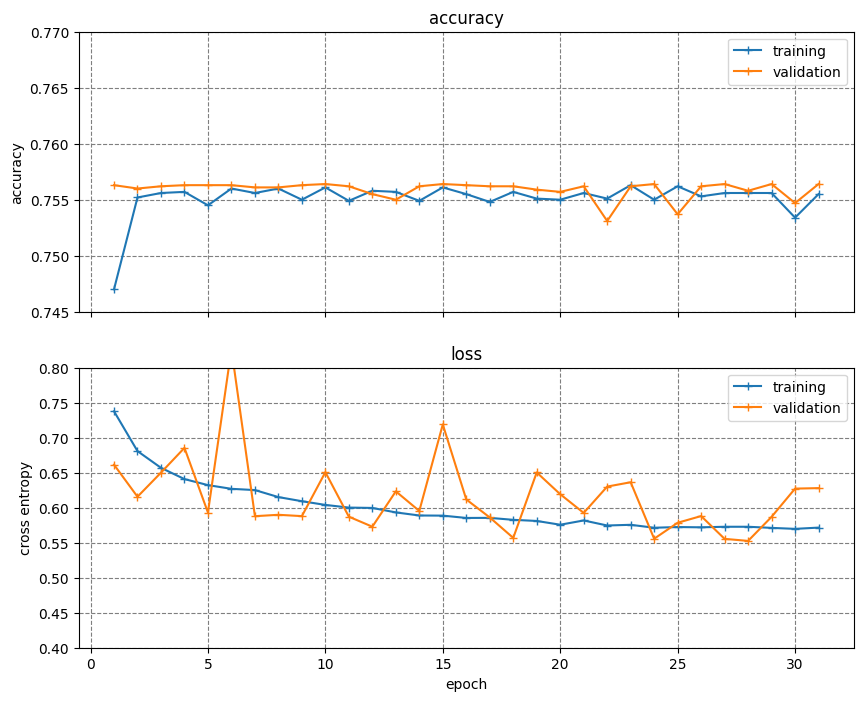

In [ ]:
# alternate
import pandas as pd
import numpy as np

# Define the epoch, accuracy, loss, val_accuracy, and val_loss values
epochs = list(range(1, 30))
accuracy = [0.7470, 0.7552, 0.7556, 0.7557, 0.7545, 0.7560, 0.7556, 0.7560, 0.7550, 0.7561,
            0.7549, 0.7558, 0.7557, 0.7549, 0.7561, 0.7555, 0.7548, 0.7557, 0.7551, 0.7550,
            0.7556, 0.7551, 0.7563, 0.7550, 0.7562, 0.7553, 0.7556, 0.7556, 0.7556, 0.7534,
          0.7555]

loss = [0.7378, 0.6809, 0.6570, 0.6409, 0.6323, 0.6270, 0.6252, 0.6152, 0.6093, 0.6040,
        0.6002, 0.5997, 0.5933, 0.5889, 0.5887, 0.5854, 0.5855, 0.5827, 0.5811, 0.5757,
        0.5818, 0.5746, 0.5756, 0.5714, 0.5724, 0.5720, 0.5728, 0.5728, 0.5712, 0.5698,
        0.5716]

val_accuracy = [0.7563, 0.7560, 0.7562, 0.7563, 0.7563, 0.7563, 0.7561, 0.7561, 0.7563, 0.7564,
                0.7562, 0.7555, 0.7550, 0.7562, 0.7564, 0.7563, 0.7562, 0.7562, 0.7559, 0.7557,
                0.7562, 0.7531, 0.7562, 0.7564, 0.7537, 0.7562, 0.7564, 0.7558, 0.7564, 0.7547,
                0.7564]

val_loss = [0.6615, 0.6157, 0.6501, 0.6855, 0.5931, 0.8267, 0.5879, 0.5899, 0.5880, 0.6508,
            0.5872, 0.5729, 0.6234, 0.5954, 0.7190, 0.6118, 0.5861, 0.5569, 0.6504, 0.6193,
             0.5926, 0.6302, 0.6364, 0.5557, 0.5785, 0.5881, 0.5555, 0.5526, 0.5870, 0.6273,
             0.6280]

# Create a dictionary with the data
data = {
    #'epoch': epochs,
    'accuracy': accuracy,
    'loss': loss,
    'val_accuracy': val_accuracy,
    'val_loss': val_loss
}

# Create the DataFrame
df = pd.DataFrame(data)



import matplotlib.pyplot as plt
acc = df['accuracy']
val_acc = df['val_accuracy']

loss = df['loss']
val_loss = df['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)

x_plot = np.arange(1, 32)

ax[0].plot(x_plot, acc, '+-', label='training')
ax[0].plot(x_plot, val_acc, '+-', label='validation')
ax[0].legend()
ax[0].set_ylabel('accuracy')
ax[0].set_ylim(0.745, 0.77)
ax[0].grid(ls='--', c='C7')
ax[0].set_title('accuracy')

ax[1].plot(x_plot, loss, '+-', label='training')
ax[1].plot(x_plot, val_loss, '+-', label='validation')
ax[1].legend()
ax[1].set_ylabel('cross entropy')
ax[1].set_ylim(0.4, 0.8)
ax[1].grid(ls='--', c='C7')
ax[1].set_title('loss')
ax[1].set_xlabel('epoch')

plt.show()


In [ ]:
y_pred = model.predict(test_gen)
y_pred = np.argmax(y_pred,axis=1)

576/576 [==============================] - 16s 28ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_gen.labels,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6935
           1       0.00      0.00      0.00       514
           2       0.50      0.02      0.04      1675
           3       0.00      0.00      0.00        82

    accuracy                           0.75      9206
   macro avg       0.31      0.25      0.22      9206
weighted avg       0.66      0.75      0.65      9206



In [ ]:
import pandas as pd
classes=['destroyed','major-damage','minor-damage', 'no-damage']
con_mat_df = pd.DataFrame(confusion_matrix(test_gen.labels,y_pred),
                     index = classes,
                     columns = classes)

In [ ]:
con_mat_df

,destroyed,major-damage,minor-damage,no-damage
destroyed,6903,0,32,0
major-damage,514,0,0,0
minor-damage,1641,0,34,0
no-damage,80,0,2,0


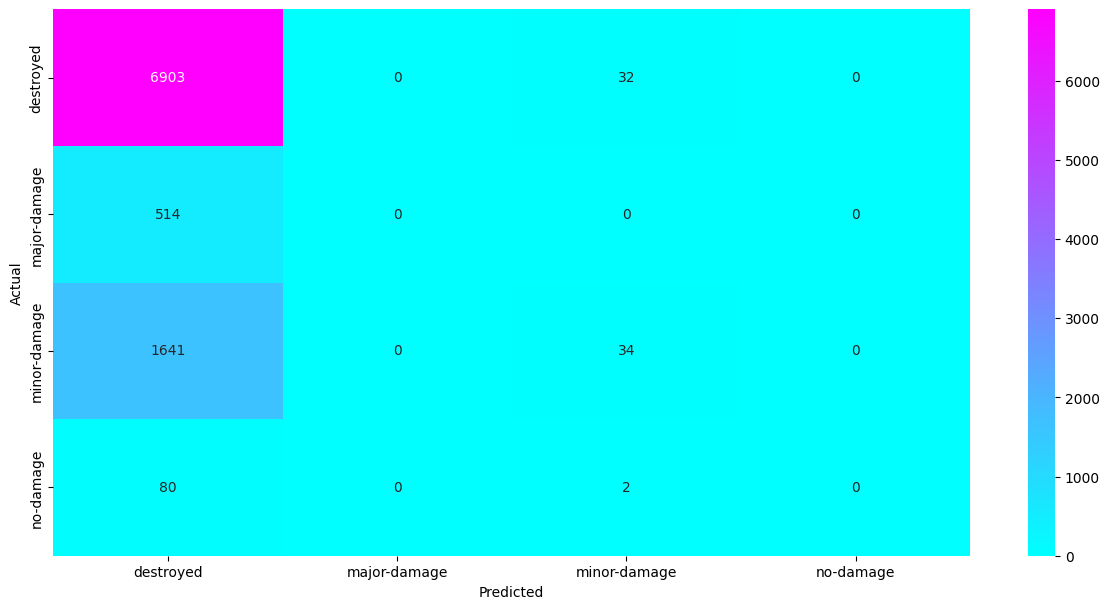

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(12, 6))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate, Input
from tensorflow.keras.models import Model


def generate_xBD_baseline_model():
  weights = 'imagenet'
  inputs = Input(shape=(128, 128, 3))

  base_model = ResNet50(include_top=False, weights=weights, input_shape=(128, 128, 3))

  for layer in base_model.layers:
    layer.trainable = False

  x = Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3))(inputs)
  x = Conv2D(16, (3, 3), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Dropout(rate=0.3)(x)

  x = Conv2D(32, (3, 3), activation='relu')(x)
  x = Conv2D(32, (3, 3), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Dropout(rate=0.3)(x)

  x = Flatten()(x)

  base_resnet = base_model(inputs)
  base_resnet = Flatten()(base_resnet)

  concated_layers = Concatenate()([x, base_resnet])

  concated_layers = Dense(524, activation='relu')(concated_layers)
  concated_layers = Dense(254, activation='relu')(concated_layers)
  concated_layers = Dense(124, activation='relu')(concated_layers)
  concated_layers = Dropout(rate=0.5)(concated_layers)

  output = Dense(4, activation='relu')(concated_layers)

  model = Model(inputs=inputs, outputs=output)
  return model

In [ ]:
res_model = generate_xBD_baseline_model()

res_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = res_model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=25,
  callbacks=[early],
  steps_per_epoch=train_gen.samples//batch_size,
  validation_steps=val_gen.samples//batch_size
)

Epoch 1/25
2301/2301 [==============================] - 477s 203ms/step - loss: 1.0364 - accuracy: 0.7492 - val_loss: 0.8308 - val_accuracy: 0.7547
Epoch 2/25
2301/2301 [==============================] - 493s 214ms/step - loss: 0.9239 - accuracy: 0.7548 - val_loss: 0.8388 - val_accuracy: 0.7548
Epoch 3/25
2301/2301 [==============================] - 443s 193ms/step - loss: 0.8641 - accuracy: 0.7547 - val_loss: 0.8210 - val_accuracy: 0.7548
Epoch 4/25
2301/2301 [==============================] - 496s 216ms/step - loss: 0.8386 - accuracy: 0.7547 - val_loss: 0.8203 - val_accuracy: 0.7547
Epoch 5/25
2301/2301 [==============================] - 492s 214ms/step - loss: 0.8272 - accuracy: 0.7547 - val_loss: 0.8176 - val_accuracy: 0.7547
Epoch 6/25
2301/2301 [==============================] - 440s 191ms/step - loss: 0.8174 - accuracy: 0.7548 - val_loss: 0.8186 - val_accuracy: 0.7547
Epoch 7/25
2301/2301 [==============================] - 494s 215ms/step - loss: 0.8207 - accuracy: 0.7548 - val_

In [ ]:
res_model.save('my_model.h5')